# Analysis of daytime surface skin temperature at 1x1 degree

In [6]:

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as sm
import scipy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
AIRS_PATH="airs/data/" # path for airs csv data
COVID_PATH="covidoxford/data/"  # path for covid oxford csv files
CITIES_PATH="cities/data/" # path for indian cities csv files

In [8]:
cities_df=pd.read_csv(CITIES_PATH+"cities_1degx1deg.csv",error_bad_lines=False)#delimiter="~")

b'Skipping line 164: expected 5 fields, saw 6\n'


In [9]:
airs_df=pd.read_csv(AIRS_PATH+"indian_cities_1degx1deg_airs.csv")

In [10]:
airs_df["metric"].unique()

array(['SurfPres_Forecast_TqJ_A', 'SurfSkinTemp_TqJ_A', 'EmisIR_TqJ_A#1',
       'EmisIR_TqJ_A#2', 'EmisIR_TqJ_A#3', 'EmisIR_TqJ_A#4',
       'Temperature_TqJ_A#1', 'Temperature_TqJ_A#2',
       'Temperature_TqJ_A#3', 'Temperature_TqJ_A#4',
       'Temperature_TqJ_A#5', 'Temperature_TqJ_A#6',
       'Temperature_TqJ_A#7', 'Temperature_TqJ_A#8',
       'Temperature_TqJ_A#9', 'Temperature_TqJ_A#10',
       'Temperature_TqJ_A#11', 'Temperature_TqJ_A#12',
       'Temperature_TqJ_A#13', 'Temperature_TqJ_A#14',
       'Temperature_TqJ_A#15', 'Temperature_TqJ_A#16',
       'Temperature_TqJ_A#17', 'Temperature_TqJ_A#18',
       'Temperature_TqJ_A#19', 'Temperature_TqJ_A#20',
       'Temperature_TqJ_A#21', 'Temperature_TqJ_A#22',
       'Temperature_TqJ_A#23', 'Temperature_TqJ_A#24',
       'SurfAirTemp_TqJ_A', 'TropPres_TqJ_A', 'TropTemp_TqJ_A',
       'TotH2OVap_TqJ_A', 'H2O_MMR_Lyr_TqJ_A#1', 'H2O_MMR_Lyr_TqJ_A#2',
       'H2O_MMR_Lyr_TqJ_A#3', 'H2O_MMR_Lyr_TqJ_A#4',
       'H2O_MMR_Lyr_TqJ_A

In [11]:
metric="SurfSkinTemp_TqJ_A"
metric_df=airs_df[(airs_df["metric"]==metric)&(airs_df["mean"]>-9999)&(~airs_df["mean"].isna())]

# Weekwise Surface Skin Temperature average of all cities of 2019 and 2020

Taking difference across all weeks.

For every week we will get 310 points as there are unique 310 cities as per 1 degree. Subtract values of every week of 2020 (310 points) from every week of 2019 (310 points) and have it's mean. 

In [12]:
x=[]
values1=[]
values2=[]
for month in range(1,13):
    for week in range(1,5):
        week1=str(month)+".2019.week"+str(week)
        week2=str(month)+".2020.week"+str(week)
        week1_data=metric_df[metric_df["week"]==week1].set_index("location")["mean"].to_dict()
        week2_data=metric_df[metric_df["week"]==week2].set_index("location")["mean"].to_dict()
        temp1=[]
        temp2=[]
        for location in week1_data:
            if location in week2_data:
                temp1.append(week1_data[location])
                temp2.append(week2_data[location])
        if len(temp1)>=100:
            x.append((month-1)*4+week)
            values1.append(np.mean(temp1))
            values2.append(np.mean(temp2))
            print(" month =",month," week =",week,"2019 =",values1[-1],"2020 =",values2[-1])

 month = 1  week = 1 2019 = 300.55338115755626 2020 = 297.71553491961413
 month = 1  week = 2 2019 = 301.52396498392284 2020 = 298.6226890353698
 month = 1  week = 3 2019 = 301.67006717041806 2020 = 299.4360935369775
 month = 1  week = 4 2019 = 301.218799903537 2020 = 300.92433655948554
 month = 2  week = 1 2019 = 303.07774877813506 2020 = 301.17948639871383
 month = 2  week = 2 2019 = 304.8578181672026 2020 = 302.47158893890673
 month = 2  week = 3 2019 = 306.37047832797424 2020 = 305.5763418006431
 month = 3  week = 1 2019 = 306.4136107395498 2020 = 305.8209914790997
 month = 3  week = 2 2019 = 309.22696463022504 2020 = 307.44614135048226
 month = 3  week = 3 2019 = 311.10070800643086 2020 = 310.18998745980707
 month = 3  week = 4 2019 = 313.7804708681672 2020 = 311.74620655948553
 month = 4  week = 1 2019 = 314.9106211254019 2020 = 314.04222729903535
 month = 4  week = 2 2019 = 316.27416549839234 2020 = 315.4956792604501
 month = 4  week = 3 2019 = 314.84000723472667 2020 = 313.8707

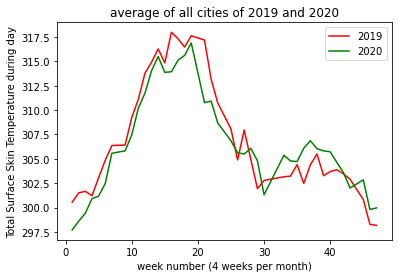

In [15]:
plt.plot(x,values1,label="2019",color="red")
plt.plot(x,values2,label="2020",color="green")
plt.legend()
plt.title('average of all cities of 2019 and 2020')
plt.xlabel("week number (4 weeks per month)")
plt.ylabel("Total Surface Skin Temperature during day")
plt.show()

Takeaway: In general, the surface skin temperature for both the years follow the similar curve. But if we look closely, there might be a hint of some small change. During lockdown, 2020 has seen little lesser temperature and during the end of the year, particularly in the months of september and october, there seems to be a bit higher temperature in 2020.

# Difference in Surface Skin Temperature values between the same week of 2020 and 2019

In [ ]:
week1="3.2019.week1"
week2="3.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_2020"]-week_df["mean_2019"])*100/week_df["mean_2019"]
week_df["diff"].describe()

count    311.000000
mean      -0.170684
std        0.791966
min       -2.385196
25%       -0.753169
50%       -0.133865
75%        0.340849
max        2.894624
Name: diff, dtype: float64

In [ ]:
week1="4.2019.week4"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_2020"]-week_df["mean_2019"])*100/week_df["mean_2019"]
week_df["diff"].describe()

count    311.000000
mean      -1.259560
std        1.073839
min       -4.452009
25%       -1.908376
50%       -1.193839
75%       -0.554837
max        1.089222
Name: diff, dtype: float64

In [ ]:
print("cities with high decrease")
temp=week_df[week_df["diff"]<=-3]["city"].tolist()
print(temp)

cities with high decrease
['Fyzabad', 'Gorakhpur', 'Bettiah', 'Mirzapur', 'Arrah', 'Patna', 'Singrauli', 'Renukut', 'Dehri', 'Gaya', 'Jamui', 'Dhulian', 'Ambikapur', 'Lohardaga', 'Ranchi', 'Asansol', 'Durgapur', 'Pathalgaon', 'Raurkela', 'Chaibasa', 'Jamshedpur']


In [ ]:
print("cities with low decrease")
temp=week_df[week_df["diff"]>=-0]["city"].tolist()
print(temp)

cities with low decrease
['Srinagar', 'Pahlgam', 'Kargil', 'Anantnag', 'Kyelang', 'Along', 'Dibrugarh', 'Tinsukia', 'Tezu', 'Jaigaon', 'Bongaigaon', 'Guwahati', 'Tezpur', 'Golaghat', 'Jorhat', 'Bhuj', 'Dwarka', 'Nadiad', 'Porbandar', 'Surat', 'Veraval', 'Una', 'Ozar', 'Mormugao', 'Karwar', 'Udupi', 'Shimoga', 'Chennai', 'Mangalore', 'Payyannur', 'Kozhikode', 'Tiruppur', 'Kavaratti', 'Ponnani', 'Teni', 'Cochin', 'Thiruvananthapuram']


In [ ]:
week_df[week_df["population"]>=5000000]

,location,week_2019,mean_2019,sdev_2019,week_2020,mean_2020,sdev_2020,city,population,elevation,diff
33,28.5#77.5,4.2019.week4,320.10156,2.968750,4.2020.week4,314.59375,3.281250,Delhi,19975171,216,-1.720645
70,26.5#80.5,4.2019.week4,321.82030,2.625000,4.2020.week4,312.85938,3.734375,Kanpur,5804013,130,-2.784448
137,23.5#72.5,4.2019.week4,327.17970,2.437500,4.2020.week4,326.55470,2.359375,Ahmedabad,7164583,101,-0.191027
177,22.5#88.5,4.2019.week4,310.90625,1.851562,4.2020.week4,306.37500,1.554688,Kolkata,13043739,10,-1.457433
182,21.5#72.5,4.2019.week4,315.04688,9.312500,4.2020.week4,315.10156,9.187500,Surat,5615467,19,0.017356
216,19.5#72.5,4.2019.week4,306.55470,7.468750,4.2020.week4,305.84375,5.781250,Mumbai,15527315,15,-0.231916
217,19.5#73.5,4.2019.week4,325.25780,3.281250,4.2020.week4,322.90625,2.671875,Navi Mumbai,8209055,286,-0.722980
232,18.5#73.5,4.2019.week4,322.46875,4.062500,4.2020.week4,320.14844,3.343750,Pune,6020226,369,-0.719546
248,17.5#78.5,4.2019.week4,326.49220,2.718750,4.2020.week4,321.56250,2.546875,Hyderabad,5412838,532,-1.509898
284,13.5#80.5,4.2019.week4,303.42970,0.906250,4.2020.week4,305.05470,3.140625,Chennai,5720838,15,0.535544


Takeaway: In the first week of march, there wasnt much difference among the two years 2019 and 2020. It seems that during the lockdown period, the temperature decreased in 2020, compared to 2019. That would be upto 3-4 degrees Kelvin

# Comparison of percentage change between pre and post lockdown dates of 2019 and 2020

        diff_2019   diff_2020    population    elevation
count  310.000000  310.000000  3.100000e+02   310.000000
mean     2.414329    1.934729  9.437761e+05   368.116129
std      1.185974    0.851032  1.889464e+06   484.641962
min     -0.246274   -1.395695  0.000000e+00 -1226.000000
25%      1.474335    1.394513  2.000580e+05    92.000000
50%      2.516363    2.020658  4.516755e+05   246.500000
75%      3.347971    2.535640  1.002666e+06   456.000000
max      5.059510    4.045890  1.997517e+07  3560.000000


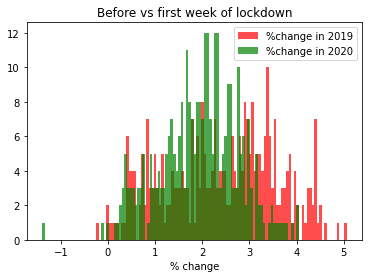

In [17]:
week1="3.2019.week1"
week2="3.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="3.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.xlabel('% change')
plt.title("Before vs first week of lockdown")
plt.show()

Ttest_indResult(statistic=6.635866906188884, pvalue=7.059324219668253e-11)
        diff_2019   diff_2020    population    elevation
count  310.000000  310.000000  3.100000e+02   310.000000
mean     3.795554    2.662975  9.437761e+05   368.116129
std      2.304411    1.928735  1.889464e+06   484.641962
min     -1.982154   -0.776999  0.000000e+00 -1226.000000
25%      1.958605    1.022423  2.000580e+05    92.000000
50%      3.866402    2.350042  4.516755e+05   246.500000
75%      5.684537    4.181598  1.002666e+06   456.000000
max      8.331571    7.322340  1.997517e+07  3560.000000


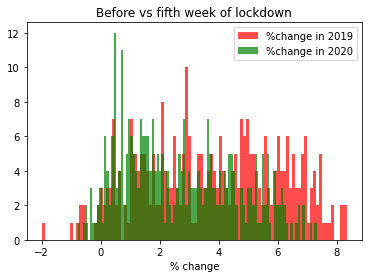

In [18]:
week1="3.2019.week1"
week2="4.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(scipy.stats.ttest_ind(week_df["diff_2019"],week_df["diff_2020"]))
print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.xlabel('% change')
plt.title("Before vs fifth week of lockdown")
plt.show()

        diff_2019   diff_2020    population    elevation
count  310.000000  310.000000  3.100000e+02   310.000000
mean     1.478836    0.995273  9.437761e+05   368.116129
std      2.849587    3.085191  1.889464e+06   484.641962
min     -5.746875   -5.893755  0.000000e+00 -1226.000000
25%     -0.171083   -0.867355  2.000580e+05    92.000000
50%      1.099661    0.350873  4.516755e+05   246.500000
75%      3.330209    2.094359  1.002666e+06   456.000000
max     11.252479   10.476384  1.997517e+07  3560.000000


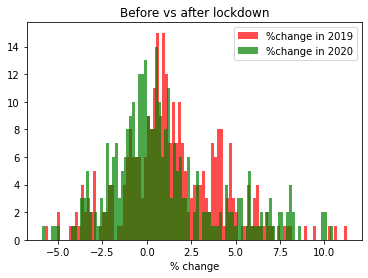

In [19]:
week1="3.2019.week1"
week2="6.2019.week3"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="6.2020.week3"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.xlabel('% change')
plt.title("Before vs after lockdown")
plt.show()

Takeaway: At the peak of the lockdown (4th and 5th week), the difference between the percentage change between in 2019 and 2020 was the most. This implies that cities in generall demonstarted lesser temperature increase (1% = 3 degrees) during those weeks in 2020.

# Impact of covid-19 on Surface Skin Temperature compared to pre-lockdown dates' values 

In [ ]:
week1="3.2019.week1"
week2="3.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019=week_df_2019[["mean_pre","mean_post"]]
week_df_2019["covid"]=0
week1="3.2020.week1"
week2="3.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020=week_df_2020[["mean_pre","mean_post"]]
week_df_2020["covid"]=1

week_df=week_df_2019.append(week_df_2020)

result = sm.ols(formula="mean_post ~ mean_pre + covid", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2891.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.00e-314
Time:                        19:42:14   Log-Likelihood:                -1591.8
No. Observations:                 622   AIC:                             3190.
Df Residuals:                     619   BIC:                             3203.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6572      4.026      2.398      0.0

Takeaway: If controlled for pre-lockdown (march first-week) temperature, covid year witnessed 1.45 degree decrease in march 4th week (first week of lockdown)

In [ ]:
week1="3.2019.week4"
week2="4.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019=week_df_2019[["mean_pre","mean_post"]]
week_df_2019["covid"]=0
week1="3.2020.week4"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020=week_df_2020[["mean_pre","mean_post"]]
week_df_2020["covid"]=1

week_df=week_df_2019.append(week_df_2020)

result = sm.ols(formula="mean_post ~ mean_pre + covid", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1223.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.04e-215
Time:                        19:42:16   Log-Likelihood:                -1873.3
No. Observations:                 622   AIC:                             3753.
Df Residuals:                     619   BIC:                             3766.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1477      6.204      2.925      0.0

Takeaway: Covid leads to decrease in Surface skin temperature of 1.5 to 2 degrees

# Surface Skin Temperature at Night

In [ ]:
metric="SurfSkinTemp_TqJ_D"
metric_df=airs_df[(airs_df["metric"]==metric)&(airs_df["mean"]>-9999)&(~airs_df["mean"].isna())]

In [ ]:
week1="3.2019.week1"
week2="4.2019.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019=week_df_2019[["mean_pre","mean_post"]]
week_df_2019["covid"]=0
week1="3.2020.week1"
week2="4.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020=week_df_2020[["mean_pre","mean_post"]]
week_df_2020["covid"]=1

week_df=week_df_2019.append(week_df_2020)

result = sm.ols(formula="mean_post ~ mean_pre + covid", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     3083.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          1.53e-322
Time:                        19:43:51   Log-Likelihood:                -1323.1
No. Observations:                 622   AIC:                             2652.
Df Residuals:                     619   BIC:                             2666.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.3856      3.215     13.183      0.0

Takeaway: Surface Skin Temperature decreased due to covid by 1.86 degrees at night between first week of march and first week of april (second week of lockdown)